In [68]:
!adb forward tcp:9999 tcp:34972

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
import numpy as np
import cv2
#Importar sleep
from time import sleep
#Se crea la instancia del objeto android
droid=android.Android()


In [90]:
droid.ttsSpeak("aqui estoy") 2288476038 2281460857

Result(id=1755, result=None, error=None)

Hubo movimiento
Hecho sin errores...


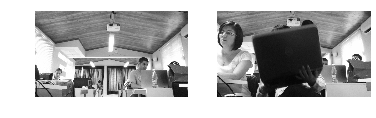

8364.84493056
hubo movimiento


In [88]:
droid.startSensingTimed(4,25)
droid.ttsSpeak("Empezando deteccion de luz")
counter = 0
counter2 = 0
counter3 = 0
while counter == 0:
    luz = droid.sensorsGetLight()
    infoIluminacion = " Iluminacion: %s" %luz[1]
    #print infoIluminacion
    if luz[1]<28:
        droid.ttsSpeak("Hubo movimiento")
        print 'Hubo movimiento'
        counter+=1
        droid.stopSensing()
        
        droid.ttsSpeak('Tomando foto')

        while counter2 <= 5:
            droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_'+str(counter2)+'.jpg',1,1)
            counter2 +=1
                    
        print 'Hecho sin errores...'

        droid.ttsSpeak('Terminado sin errores...')
        os.system('adb pull /sdcard/DCIM/CAMERA/SENSOR/ ./')
        
        droid.ttsSpeak('Empezando comparacion')
        pic = os.path.join('.','foto_original.jpg')
        img = cv2.imread(pic, 0)
        
        while counter3 <= 5:

            #compara imagenes
            pic2 = os.path.join('.','foto_'+str(counter3) +'.jpg')
            img2 = cv2.imread(pic2, 0)

            compare_images(img,img2,'titulo')
            valor = mse(img,img2)
            if valor>1000 :
                print 'Comprobado hubo movimiento'
                droid.ttsSpeak('Comprobado hubo movimiento')
                counter3 +=5
            counter3 +=1
    

In [74]:
 droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_original.jpg',1,1)


Result(id=28, result={u'takePicture': True, u'autoFocus': True, u'cameraId': 1}, error=None)

In [75]:
!adb pull /sdcard/DCIM/CAMERA/SENSOR/ ./

pull: building file list...
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_10.jpg -> ./foto_10.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_9.jpg -> ./foto_9.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_0.jpg -> ./foto_0.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_8.jpg -> ./foto_8.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_7.jpg -> ./foto_7.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto.jpg -> ./foto.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_original.jpg -> ./foto_original.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_6.jpg -> ./foto_6.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_5.jpg -> ./foto_5.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_4.jpg -> ./foto_4.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_3.jpg -> ./foto_3.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_2.jpg -> ./foto_2.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_1.jpg -> ./foto_1.jpg
13 files pulled. 0 files skipped.
3978 KB/s (12102079 bytes in 2.970s)


In [62]:
del droid

In [38]:

infoIluminacion = "Iluminacion: %s" %luz[1]

In [16]:
print infoIluminacion

Iluminacion: 41


In [48]:
droid.stopSensing()

Result(id=6284, result=None, error=None)

# Para comparar las imagenes

In [86]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
   	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	print m
    
    